
<hr><hr>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import sleep
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
import xgboost as xgb

<h2 style="color:skyblue">Data Analysis</h2>

In [17]:
df = pd.read_excel("DataSet.xlsx")
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [19]:
# << Calculating The Missed Data Rate >>
not_missed = df.count()
percents = ((df.shape[0] - not_missed) / df.shape[0])*100
missing_df = pd.concat([df.shape[0] - not_missed, percents], axis=1, keys=["Missed", "Percent"])
missing_df

,Missed,Percent
CRIM,0,0.000000
ZN,0,0.000000
INDUS,0,0.000000
CHAS,26,5.138340
NOX,0,0.000000
RM,0,0.000000
AGE,0,0.000000
DIS,27,5.335968
RAD,0,0.000000
TAX,0,0.000000


In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [21]:
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.288969,0.586719,-0.108808,-0.139448,-0.185045,0.462470,-0.314674,-0.151996,0.754362,-0.140015,-0.076602,0.392225,-0.286245
ZN,-0.288969,1.000000,-0.491587,0.027097,0.038450,0.078721,-0.488006,0.273419,0.062767,-0.256799,0.049491,0.029200,-0.390092,0.331570
INDUS,0.586719,-0.491587,1.000000,-0.278229,-0.394483,-0.448809,0.700699,-0.613465,-0.427834,0.748951,-0.351166,0.198492,0.465583,-0.411915
CHAS,-0.108808,0.027097,-0.278229,1.000000,0.750855,0.751928,-0.394058,0.705812,0.757421,-0.461679,0.602163,-0.621240,0.052407,0.136668
NOX,-0.139448,0.038450,-0.394483,0.750855,1.000000,0.975767,-0.550065,0.923152,0.985957,-0.570346,0.775302,-0.843068,0.079688,-0.332778
RM,-0.185045,0.078721,-0.448809,0.751928,0.975767,1.000000,-0.595786,0.946355,0.992620,-0.610962,0.806522,-0.830466,0.029450,0.740181
AGE,0.462470,-0.488006,0.700699,-0.394058,-0.550065,-0.595786,1.000000,-0.749412,-0.585574,0.635697,-0.477048,0.377477,0.414354,-0.299893
DIS,-0.314674,0.273419,-0.613465,0.705812,0.923152,0.946355,-0.749412,1.000000,0.947272,-0.697195,0.758289,-0.752246,-0.074013,0.129355
RAD,-0.151996,0.062767,-0.427834,0.757421,0.985957,0.992620,-0.585574,0.947272,1.000000,-0.586540,0.805556,-0.845427,0.056185,-0.217902
TAX,0.754362,-0.256799,0.748951,-0.461679,-0.570346,-0.610962,0.635697,-0.697195,-0.586540,1.000000,-0.485166,0.329963,0.284030,-0.345898


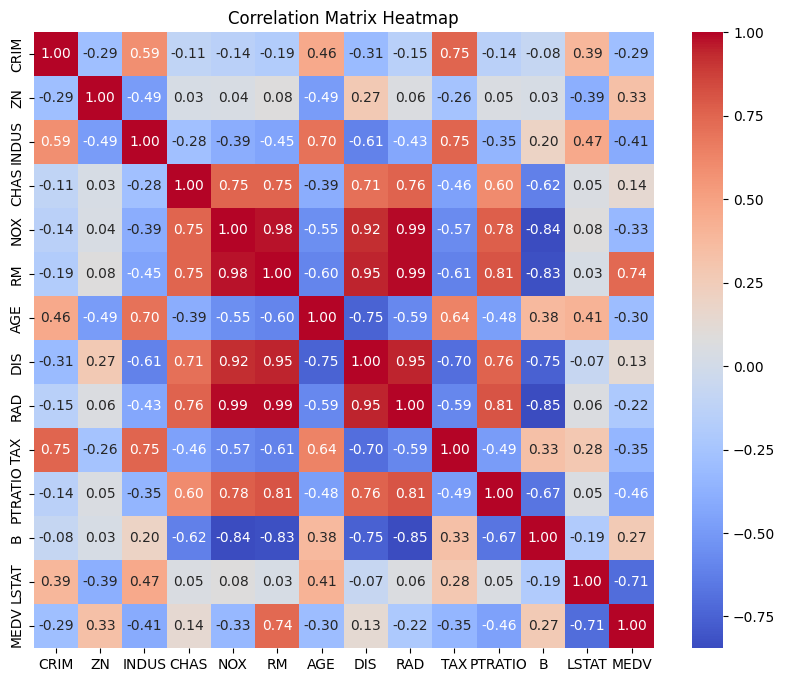

In [22]:
# << HeatMap for Correlation Matrix >>
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


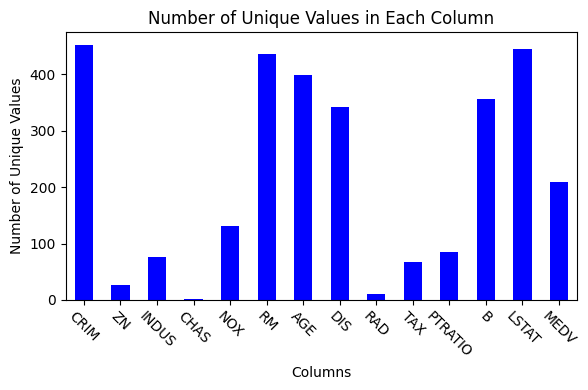

In [23]:
# Calculate the number of unique values for each column
unique_counts = df.nunique()

# Plot the bar chart
plt.figure(figsize=(6, 4))
unique_counts.plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

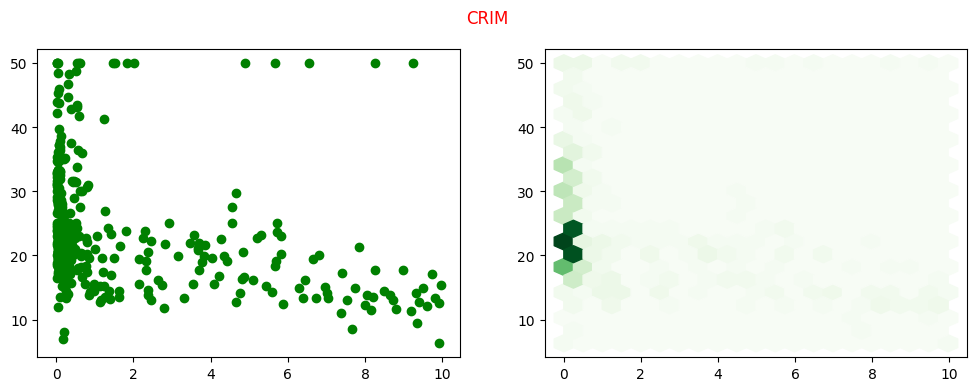

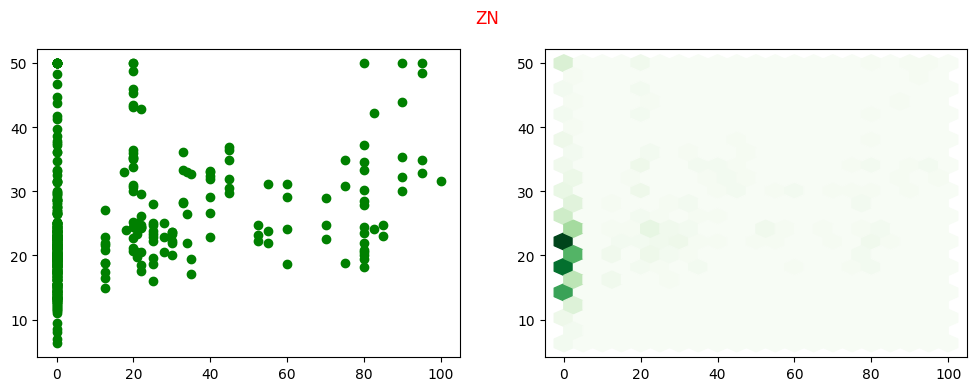

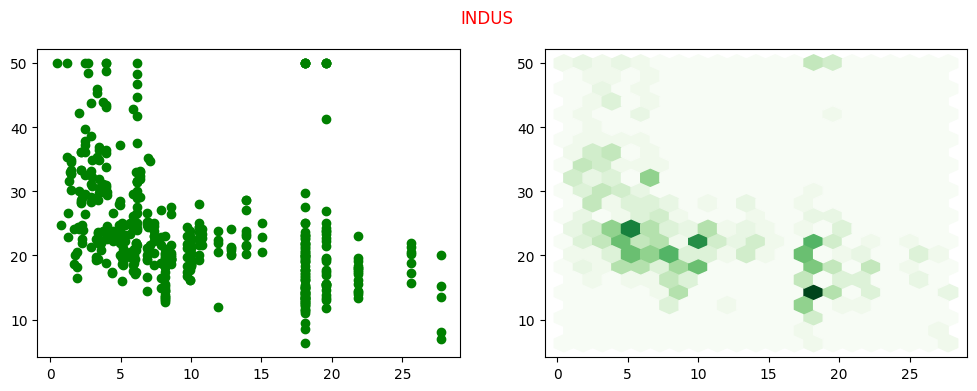

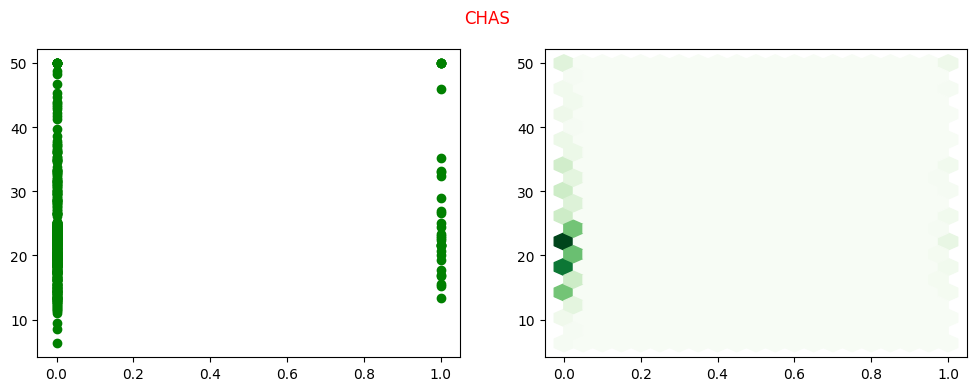

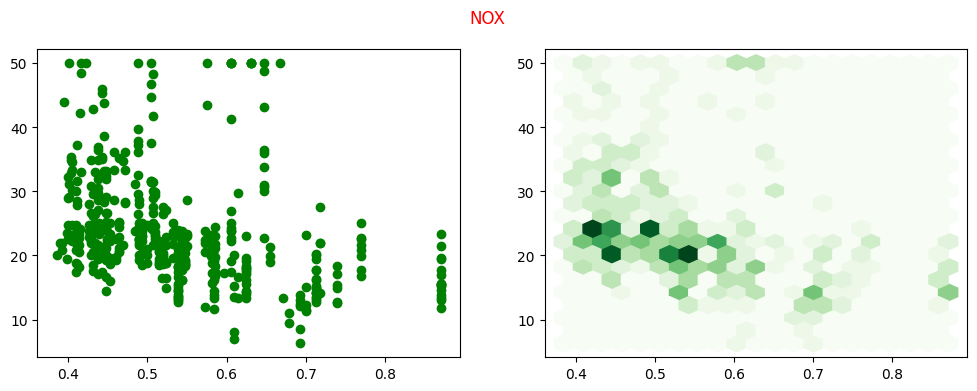

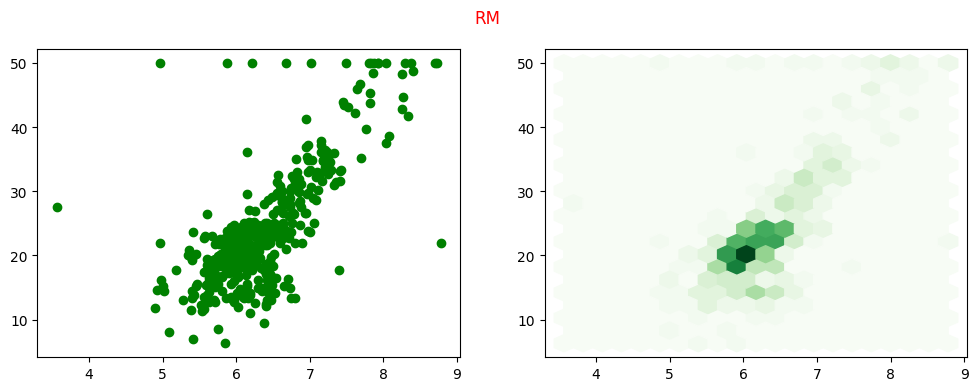

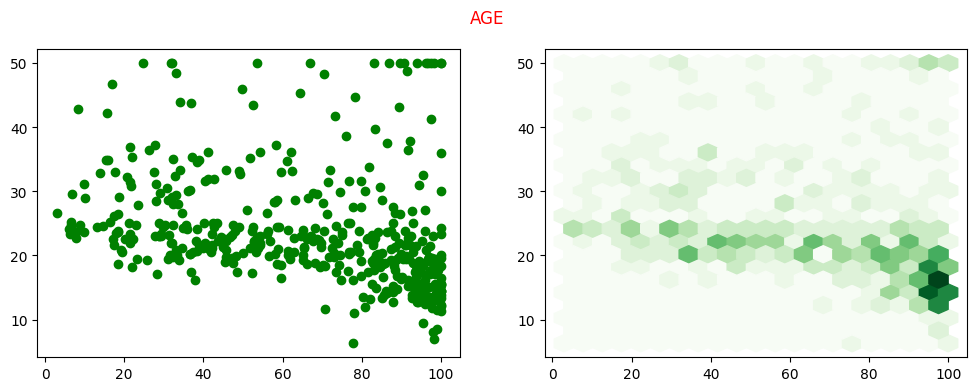

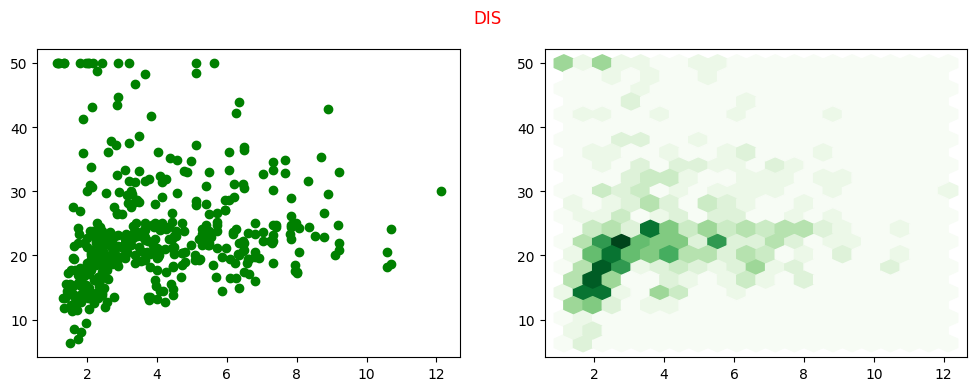

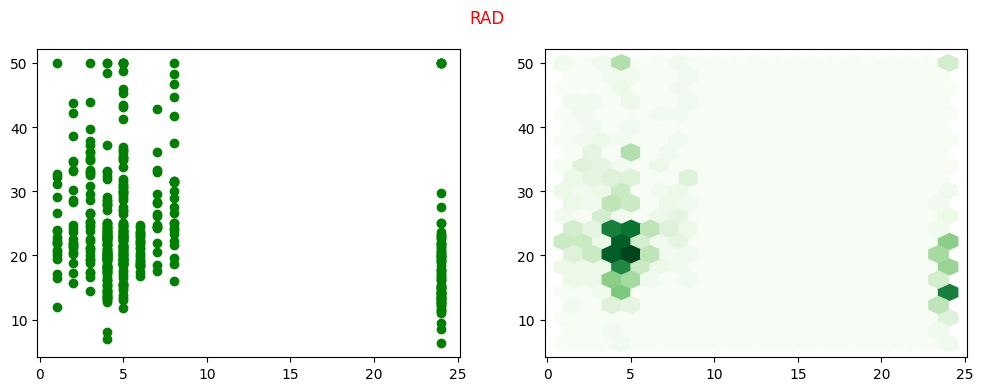

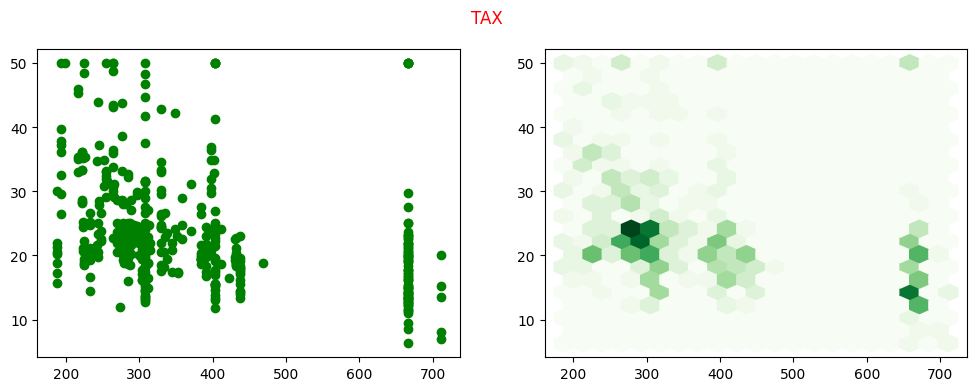

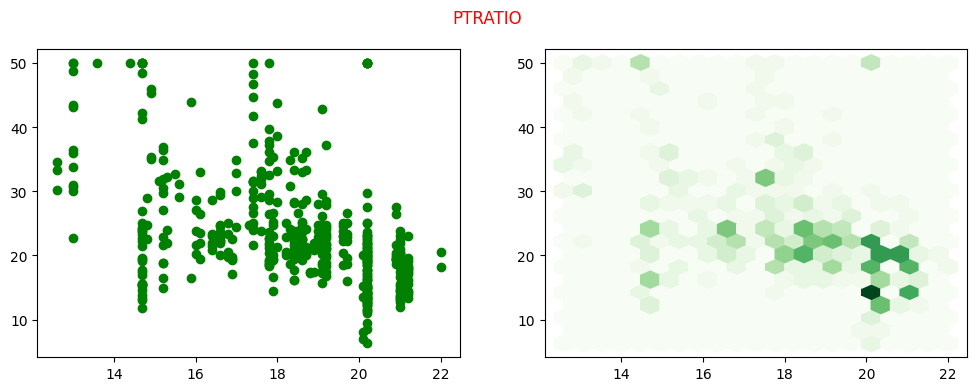

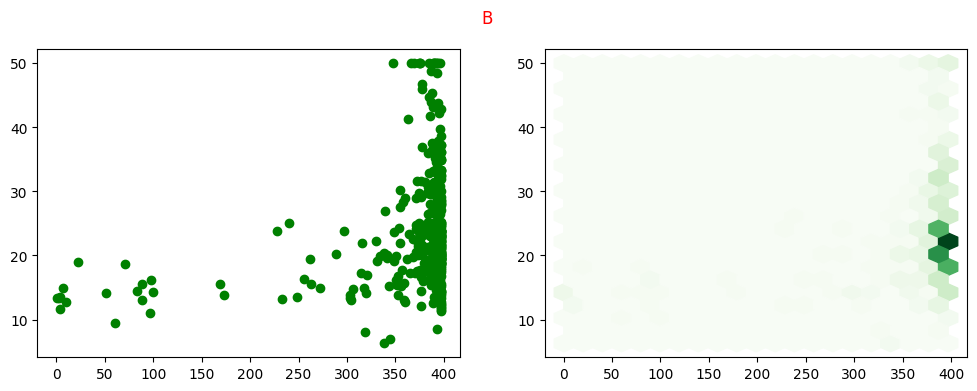

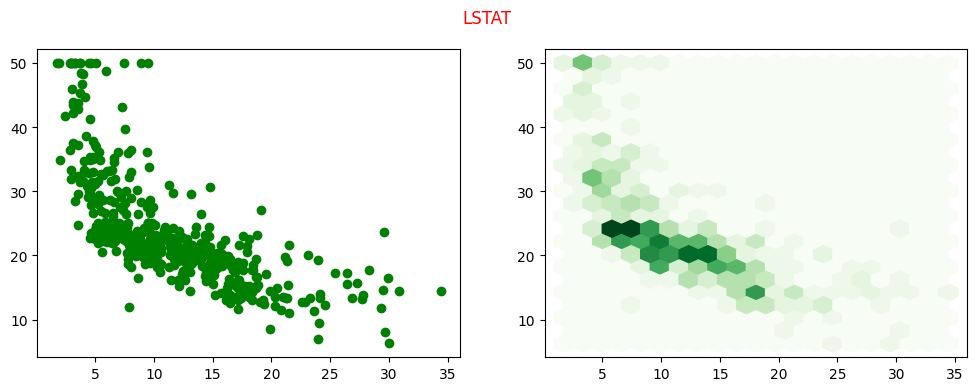

In [24]:
for col in df.columns[:-1]:
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
    plt.suptitle(col, color="red")
    axs[0].scatter(df[col], df["MEDV"], c="green")
    axs[1].hexbin(df[col], df["MEDV"], gridsize=20, cmap="Greens")
    plt.show()

<h2 style="color:skyblue">Handling the Missing Data</h2>


<h4 style="color:yellow">Method 1: Dropping Missing Values</h4>

<p>This method is straightforward and useful when the proportion of missing data is small and removing these entries won't significantly impact the dataset. It helps maintain the integrity of the remaining data without introducing potential biases or inaccuracies from imputed values.</p>

In [25]:
df_dropped = df.dropna()
print("Maximum Row Count of New DF: ", df_dropped.count().max())

Maximum Row Count of New DF:  391


<h4 style="color:yellow">Method 2: K-Nearest Neighbors (KNN) Imputation</h4>

<p>K-Nearest Neighbors (KNN) imputation is used when you want to fill in missing values based on the similarity to other instances in the dataset. This method leverages the information from the nearest neighbors (based on a defined distance metric) to predict the missing values, making it useful for maintaining patterns and relationships within the data.</p>

In [26]:
imputer = KNNImputer(n_neighbors=4)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("Maximum Row Count of New DF: ", df_imputed.count().max())

Maximum Row Count of New DF:  506


<h4 style="color:yellow">Method 3: Filling the Missing Values with Mean</h4>

<p>Filling missing values with the mean is a simple and quick method that ensures no data is lost. It is particularly useful for numerical data and helps maintain the overall distribution of the dataset. However, it can reduce variability and potentially introduce bias if the missing data is not randomly distributed.</p>

In [27]:
df_fillna_mean = df.fillna(df.mean())
print("Maximum Row Count of New DF: ", df_fillna_mean.count().max())

Maximum Row Count of New DF:  506


<h5 style="color:#00fdff">Chosen Method : KNN</h5>

In [28]:
df = df_imputed

<h4 style="color:orange">Omitting Some Features</h4>
<p>
<strong>Irrelevance to the Target Variable:</strong> If a feature is found to be irrelevant or has no significant correlation with the target variable, it may be excluded to simplify the model and improve interpretability.

<strong>Multicollinearity:</strong> In cases where multiple features are highly correlated with each other, one or more of these features can be removed to reduce redundancy and prevent multicollinearity, which can negatively impact model performance and interpretation.

<strong>Feature Redundancy:</strong> Features that convey the same information as other features can be omitted. For example, if two features are derived from the same original data, keeping both might be unnecessary.

<strong>Dimensionality Reduction:</strong> In high-dimensional datasets, some features might be omitted to reduce the complexity of the model. Techniques like Principal Component Analysis (PCA) can help identify and remove less important features.


</p>

In [29]:
# << Deleting Features:["NOX", "DIS"] Because of Their High Correlation with RM >>
df = df.drop(columns=["NOX", "DIS"])
df.shape

(506, 12)

<h4 style="color:pink">Histogram of df</h4>

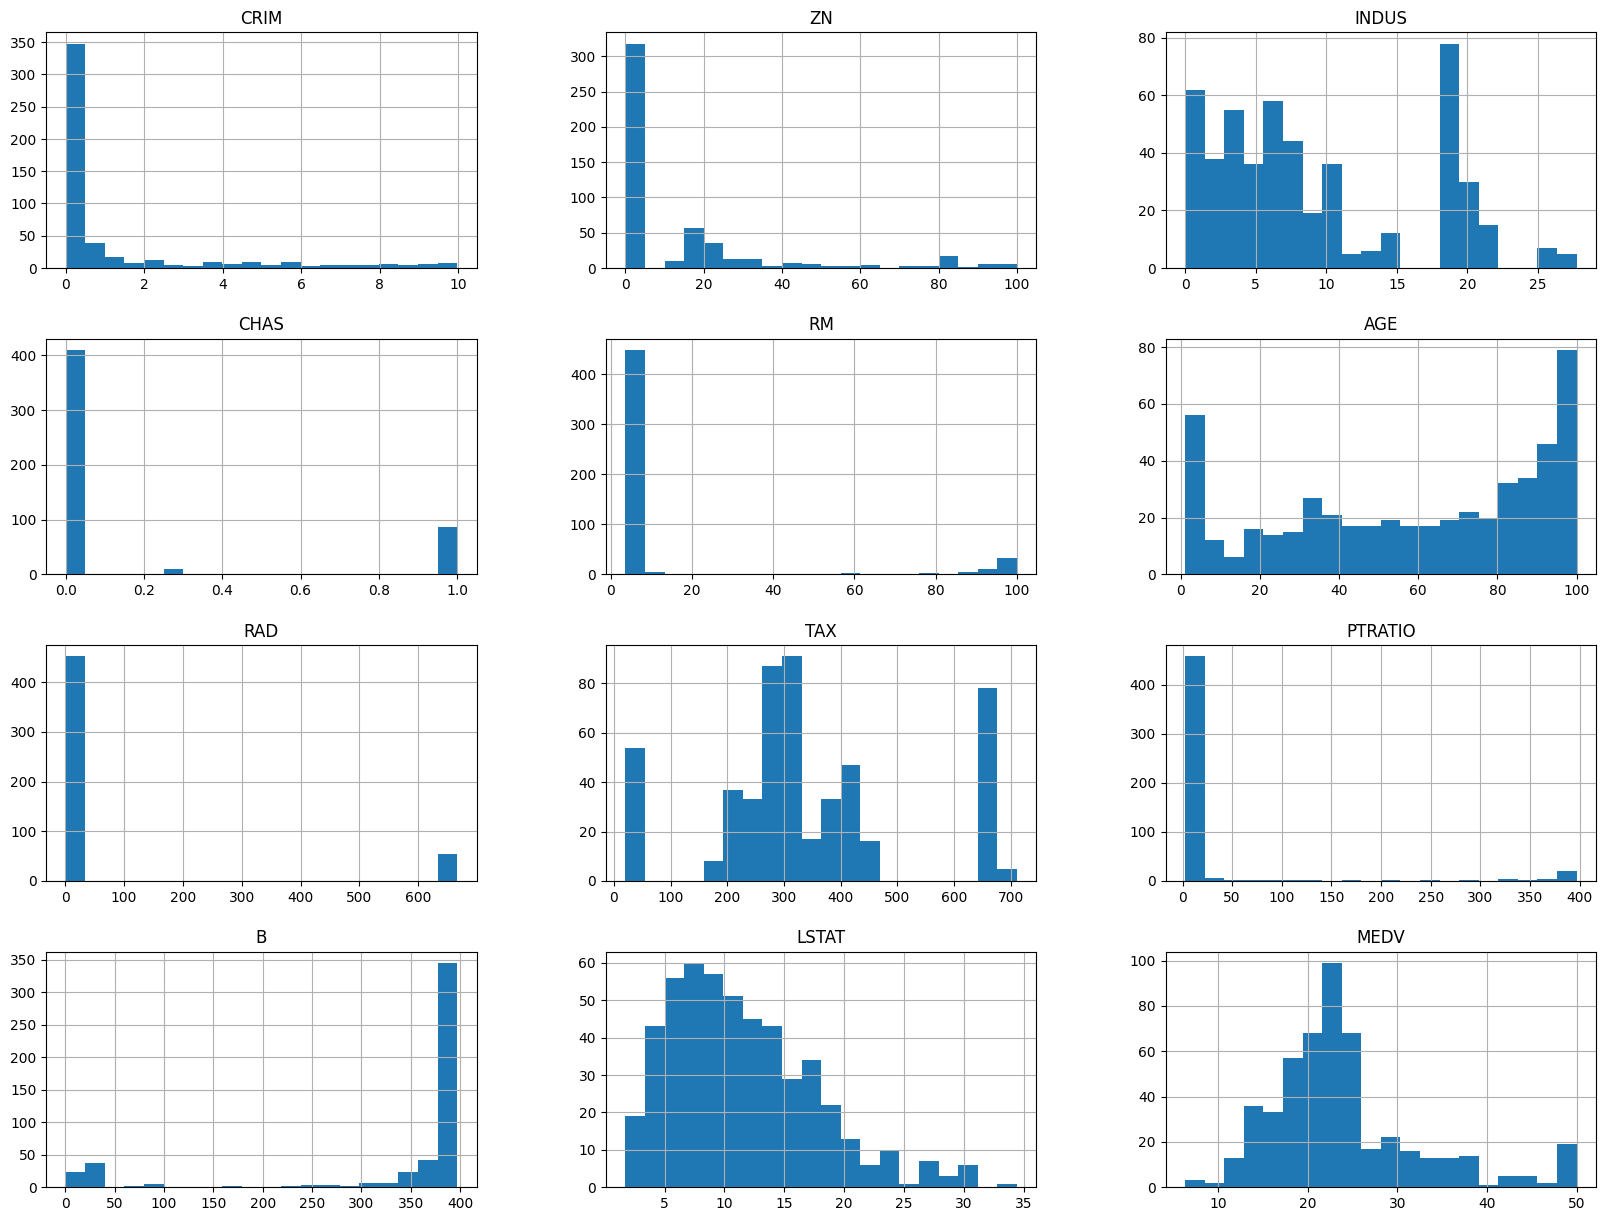

In [30]:
df.hist(bins=20, figsize=(20,15))
plt.show()

<h4 style="color:#41ff00">Standardization & Normalization</h4>

<p>
<strong>Improving Model Performance:</strong> Many machine learning algorithms, especially those that rely on distance metrics (e.g., k-Nearest Neighbors, Support Vector Machines, and clustering algorithms like K-means), perform better when features are on a similar scale. Standardizing or normalizing ensures that no single feature dominates the distance calculations due to its scale.

<strong>Speeding Up Convergence:</strong> For optimization algorithms used in training models (such as gradient descent), standardizing or normalizing the data can lead to faster convergence. When features are on similar scales, the gradient descent process can proceed more efficiently, avoiding the pitfalls of erratic and slow progress.

<hr>

<strong>Standardization:</strong>
Use when the model involves assumptions of normally distributed data or when the features naturally follow a bell curve.

<strong>Normalization:</strong>
Use when you need to bound the feature values within a specific range, especially useful in methods that require bounded inputs (e.g., neural networks using certain types of activation functions).

</p>

In [31]:
# Scaling all the columns except "CHAS" and "RAD"
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.loc[:, ~df.columns.isin(["CHAS", "RAD", "MEDV"])] = scaler.fit_transform(df.loc[:, ~df.columns.isin(["CHAS", "RAD", "MEDV"])])
df = df_scaled

In [17]:
scaler = Normalizer()
df_scaled = df.copy()
df_scaled.loc[:, ~df.columns.isin(["CHAS", "RAD", "MEDV"])] = scaler.fit_transform(df.loc[:, ~df.columns.isin(["CHAS", "RAD", "MEDV"])])

df = df_scaled

<h4 style="color:orange">Adding A Class Feature</h4>

In [33]:
medv = df["MEDV"].copy()
deciles = np.percentile(medv.sort_values(), np.arange(10, 100, 10))

def classify(value):
    if value <= deciles[1]:
        # economical
        return 0
    elif value >= deciles[7]:
        # expensive
        return 2
    else:
        # normal
        return 1

# Apply the classification
df['EXP'] = medv.apply(classify)

print(df["EXP"])

0      1
1      1
2      2
3      2
4      2
      ..
501    1
502    1
503    1
504    1
505    0
Name: EXP, Length: 506, dtype: int64


In [34]:
df["EXP"].value_counts()

EXP
1    302
2    102
0    102
Name: count, dtype: int64

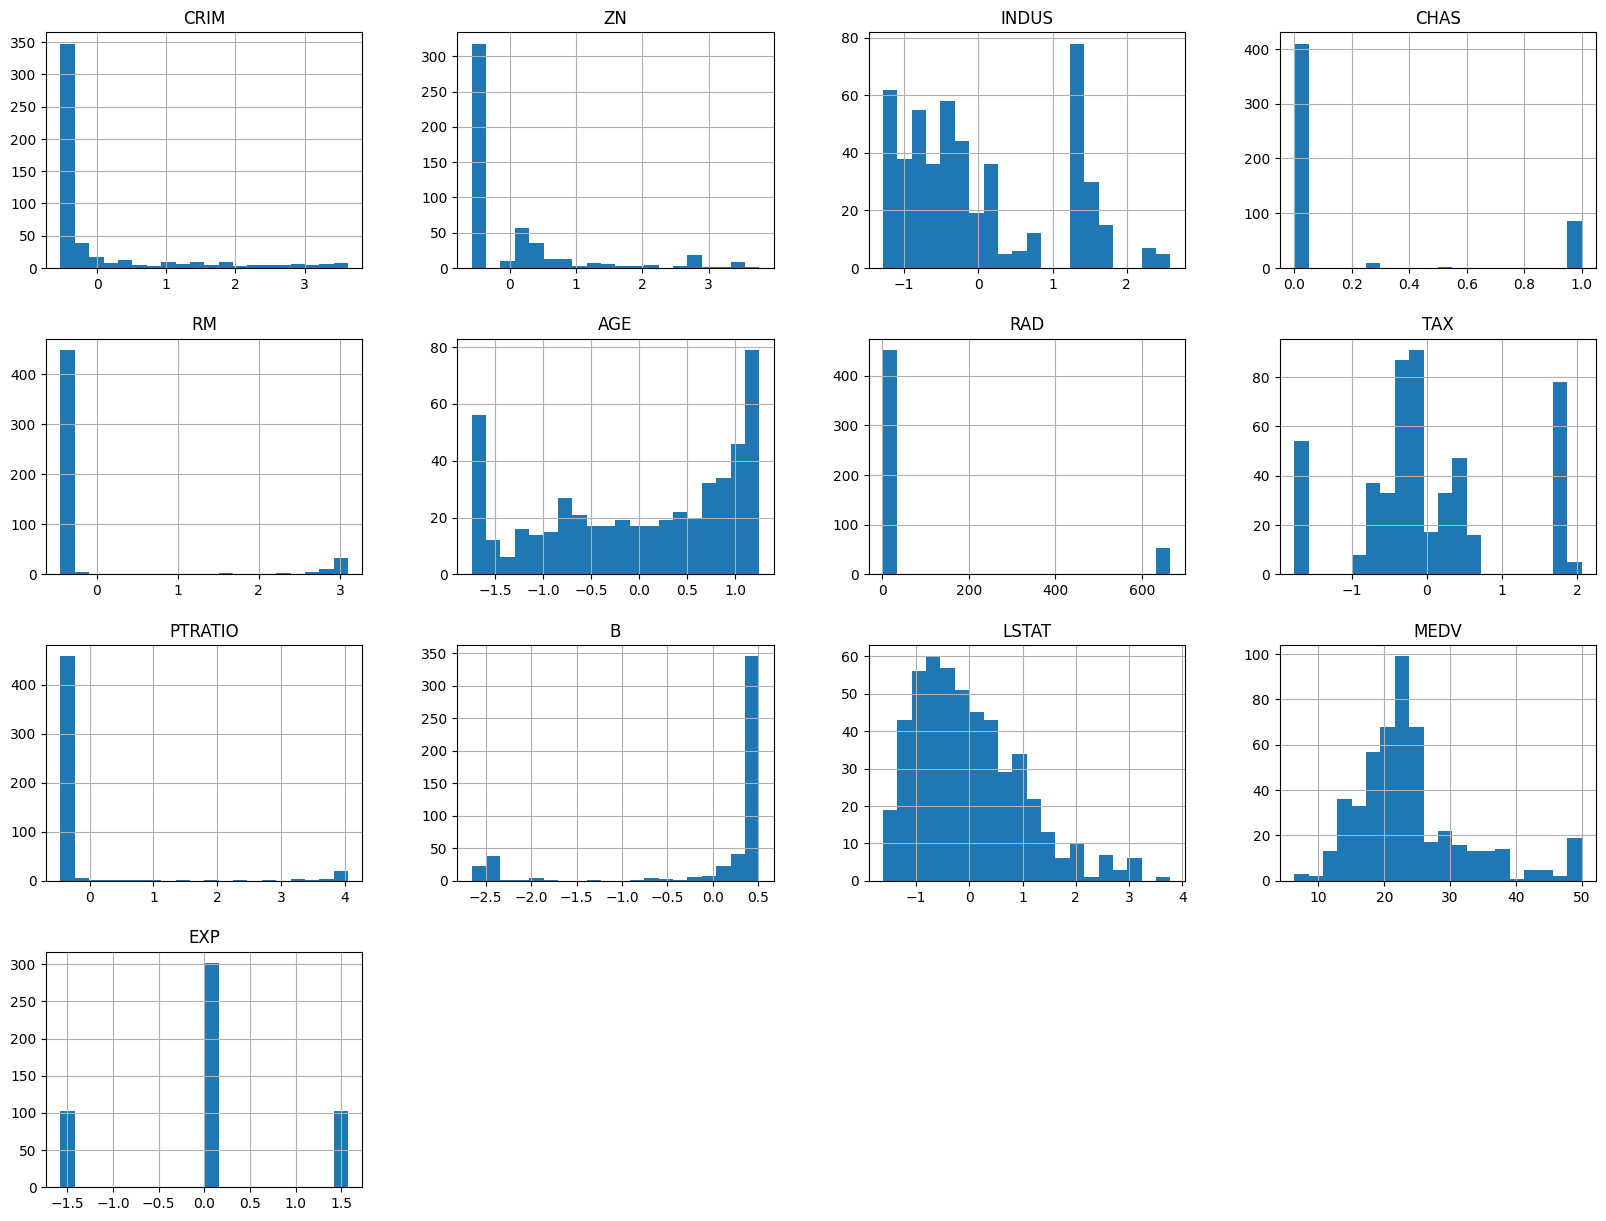

In [ ]:
df_scaled.hist(bins=20, figsize=(20, 15))
plt.show()

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [35]:
def linear_regression(input, output) -> tuple:
    
    input_sum, output_sum, product_sum, input_squared_sum = np.sum(input), np.sum(output), np.sum(output * input), np.sum(input ** 2)
    slope = (product_sum - (input_sum * output_sum) / len(input)) / (input_squared_sum - (input_sum ** 2) / len(input))
    intercept = output_sum / len(input) - slope * input_sum / len(input)

    return intercept, slope

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [36]:
def get_regression_predictions(input, intercept, slope) -> float:
    return input * slope + intercept

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [37]:
def get_root_mean_square_error(predicted_values, actual_values):
    residuals = (predicted_values - actual_values)
    _RMSE = np.sqrt(np.mean((residuals**2)))
    return _RMSE

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [45]:
def get_r2_score(predicted_values, actual_values):
    numerator = np.sum((predicted_values - actual_values)**2)
    denominator = np.sum((actual_values - np.mean(actual_values))**2)
    return 1 - (numerator / denominator)


<h4 style="color:orange">Data Split</h4>
<p>
<strong>Simple Random Split:</strong>
The dataset is randomly divided into training, validation, and test sets. A typical split ratio might be 60-20-20 or 70-15-15.<br>
Use Case: When the dataset is large enough to provide sufficient data for each subset and there is no temporal or sequential dependency in the data.

<strong>Stratified Split:</strong>
Similar to a random split, but ensures that the proportion of each class label is maintained across the training, validation, and test sets. This is particularly important for imbalanced datasets.<br>
Use Case: When dealing with classification problems, especially those with imbalanced classes, to ensure that each subset accurately represents the class distribution of the overall dataset.

<strong>K-Fold Cross-Validation:</strong>
The dataset is divided into 'k' equally sized folds. The model is trained 'k' times, each time using a different fold as the validation set and the remaining folds as the training set. The final performance is averaged over the 'k' trials.<br>
Use Case: When you want to maximize the use of your data for both training and validation and get a robust estimate of model performance. Commonly used for small to moderately sized datasets.


</p>

In [39]:
def data_splitter(df:pd.DataFrame, training_rate:float, target_col:str) -> tuple:
    df_without_target = df.loc[:, ~df.columns.isin([target_col])]
    target = df.loc[:, target_col]

    # returns => train_feature, test_feature, train_target, test_target
    return train_test_split(df_without_target, target, train_size=training_rate)


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

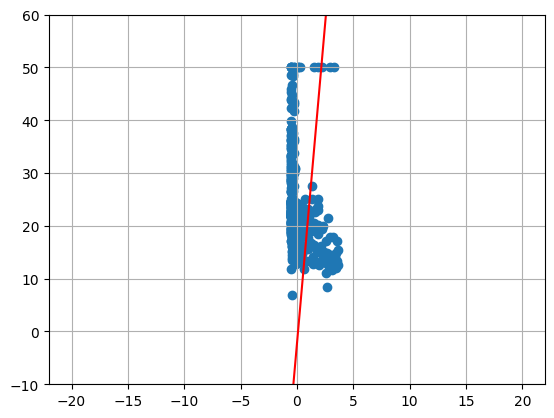


<<CRIM>> | RMSE=>  RMSE => 38.19 | R2 =>   -22.62


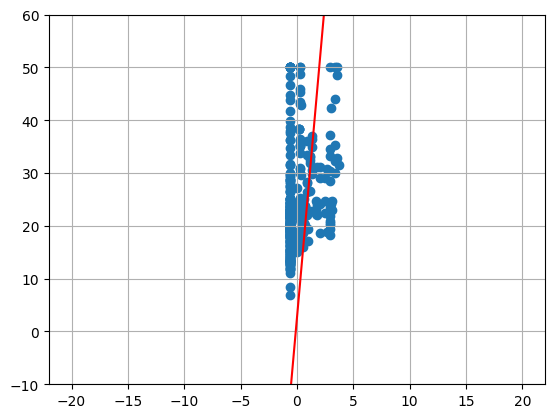


<<ZN>> | RMSE=>  RMSE => 30.09 | R2 =>   -13.66


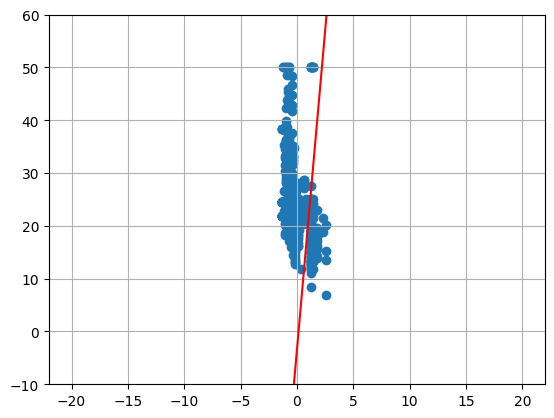


<<INDUS>> | RMSE=>  RMSE => 39.26 | R2 =>   -23.96


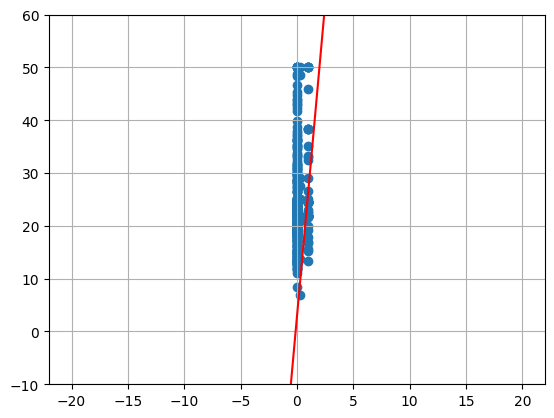


<<CHAS>> | RMSE=>  RMSE => 19.23 | R2 =>   -4.99


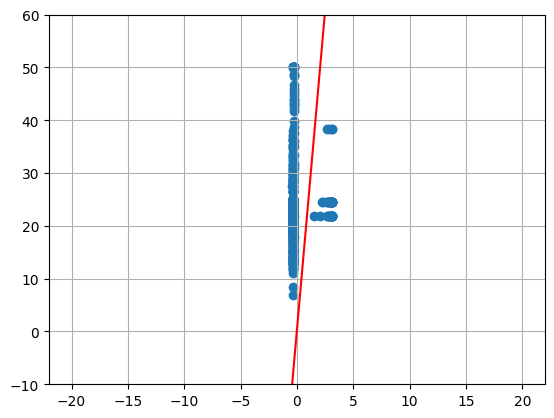


<<RM>> | RMSE=>  RMSE => 33.09 | R2 =>   -16.73


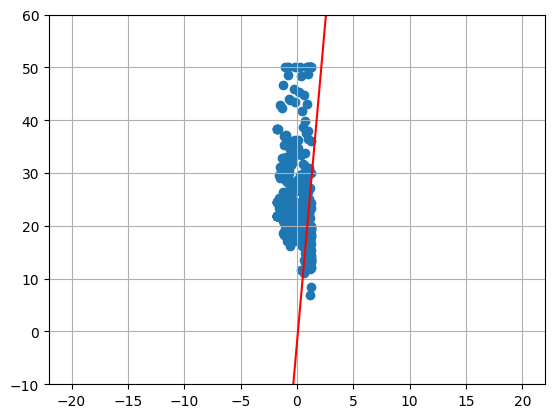


<<AGE>> | RMSE=>  RMSE => 37.68 | R2 =>   -21.99


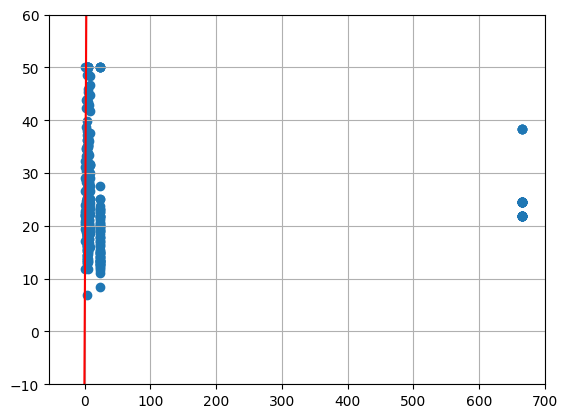


<<RAD>> | RMSE=>  RMSE => 5729.59 | R2 =>   -531578.73


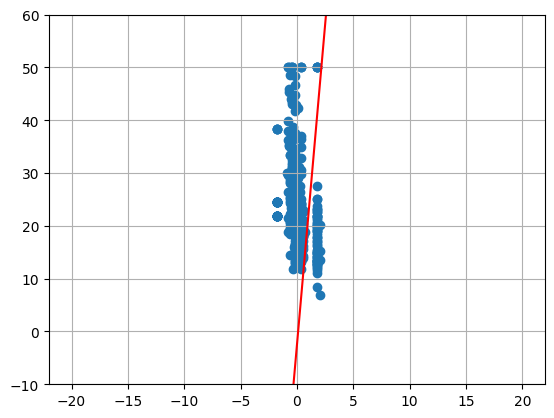


<<TAX>> | RMSE=>  RMSE => 39.78 | R2 =>   -24.62


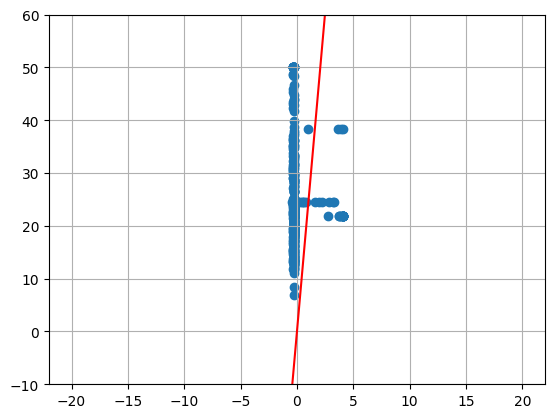


<<PTRATIO>> | RMSE=>  RMSE => 35.35 | R2 =>   -19.24


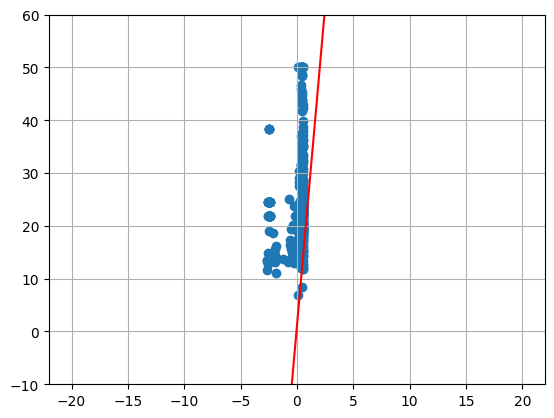


<<B>> | RMSE=>  RMSE => 34.89 | R2 =>   -18.72


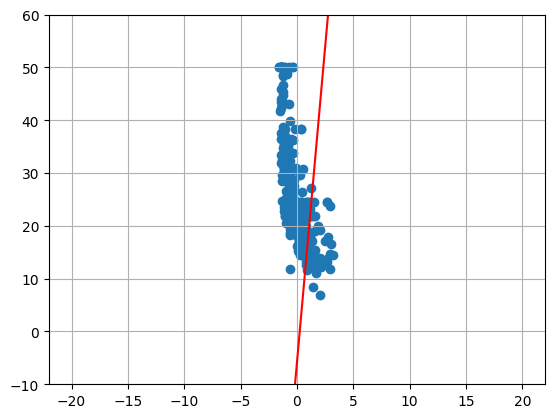


<<LSTAT>> | RMSE=>  RMSE => 39.67 | R2 =>   -24.48


In [58]:
train_feature, test_feature, train_target, test_target = data_splitter(df, 0.8, "MEDV")

for feature in df.columns[:-2]:
    alpha, beta = linear_regression(train_feature[feature], train_target)
    predicted = get_regression_predictions(test_feature[feature], intercept=beta, slope=alpha)

    line = np.poly1d([alpha, beta])
    x = np.linspace(-20, 20)
    y = line(x)

    plt.plot(x, y, "red")
    plt.scatter(train_feature[feature], train_target)
    plt.ylim(-10, 60)
    plt.grid(True)
    plt.show()

    rmse = get_root_mean_square_error(predicted, test_target)
    r2 = get_r2_score(predicted, test_target)
    print(f"\n\033[1;30;43m<<{feature}>> | {'RMSE=>':<8}{'RMSE =>':<8}{rmse:.2f} | {'R2 =>':<8}{r2:.2f}")

<h3 style="color:#41ff00">Decision Tree</h3>
<p>

<strong>What is Pruning? its advantages and disadvantages</strong>

Pruning is a technique used in decision tree algorithms to reduce the size of the tree and prevent overfitting. It involves removing sections of the tree that provide little to no additional predictive power, thereby simplifying the model and improving its generalization to new data.
<br><hr>
<strong>+ Improved Generalization:</strong>
Pruning helps the model generalize better to unseen data by reducing overfitting, where the model becomes too tailored to the training data and performs poorly on new data.
<br>

<strong>+ Simplified Models:</strong>
Results in simpler, more interpretable models. Simpler trees are easier to understand and explain, which is beneficial in applications where model transparency is important.
<br>

<strong>+ Reduced Overfitting:</strong>
By removing nodes that do not provide significant improvements, pruning ensures the model does not learn noise from the training data.


<strong>- Risk of Underfitting:</strong>
If too much pruning is done, the model may become too simple and fail to capture important patterns in the data, leading to underfitting.
<br>

<strong>- Parameter Tuning:</strong>
Pruning methods often require careful tuning of parameters (e.g., thresholds for stopping criteria or complexity parameters), which can be complex and time-consuming.


</p>

In [76]:
dec_tree = DecisionTreeClassifier(criterion='entropy',  # Criterion for the split, 'gini' or 'entropy'
                             max_depth=8,    # Maximum depth of the tree
                             min_samples_split=4,  # Minimum number of samples required to split an internal node
                             min_samples_leaf=2,   # Minimum number of samples required to be at a leaf node
                             max_features=5,    # Number of features to consider when looking for the best split
                             random_state=20)
new_df = df.drop(columns=["MEDV"])
train_feature_clf, test_feature_clf, train_target_clf, test_target_clf = data_splitter(new_df, 0.8, "EXP")

dec_tree.fit(train_feature_clf, train_target_clf)
y_pred = dec_tree.predict(test_feature_clf)

# Confusion matrix
conf_matrix = confusion_matrix(list(test_target_clf.values), list(y_pred))
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
class_report = classification_report(list(test_target_clf.values), list(y_pred))
print(f'\nClassification Report:\n{class_report}')

Confusion Matrix:
[[19  1  0]
 [ 6 55  4]
 [ 0  1 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.96      0.85      0.90        65
           2       0.80      0.94      0.86        17

    accuracy                           0.88       102
   macro avg       0.84      0.91      0.87       102
weighted avg       0.90      0.88      0.88       102



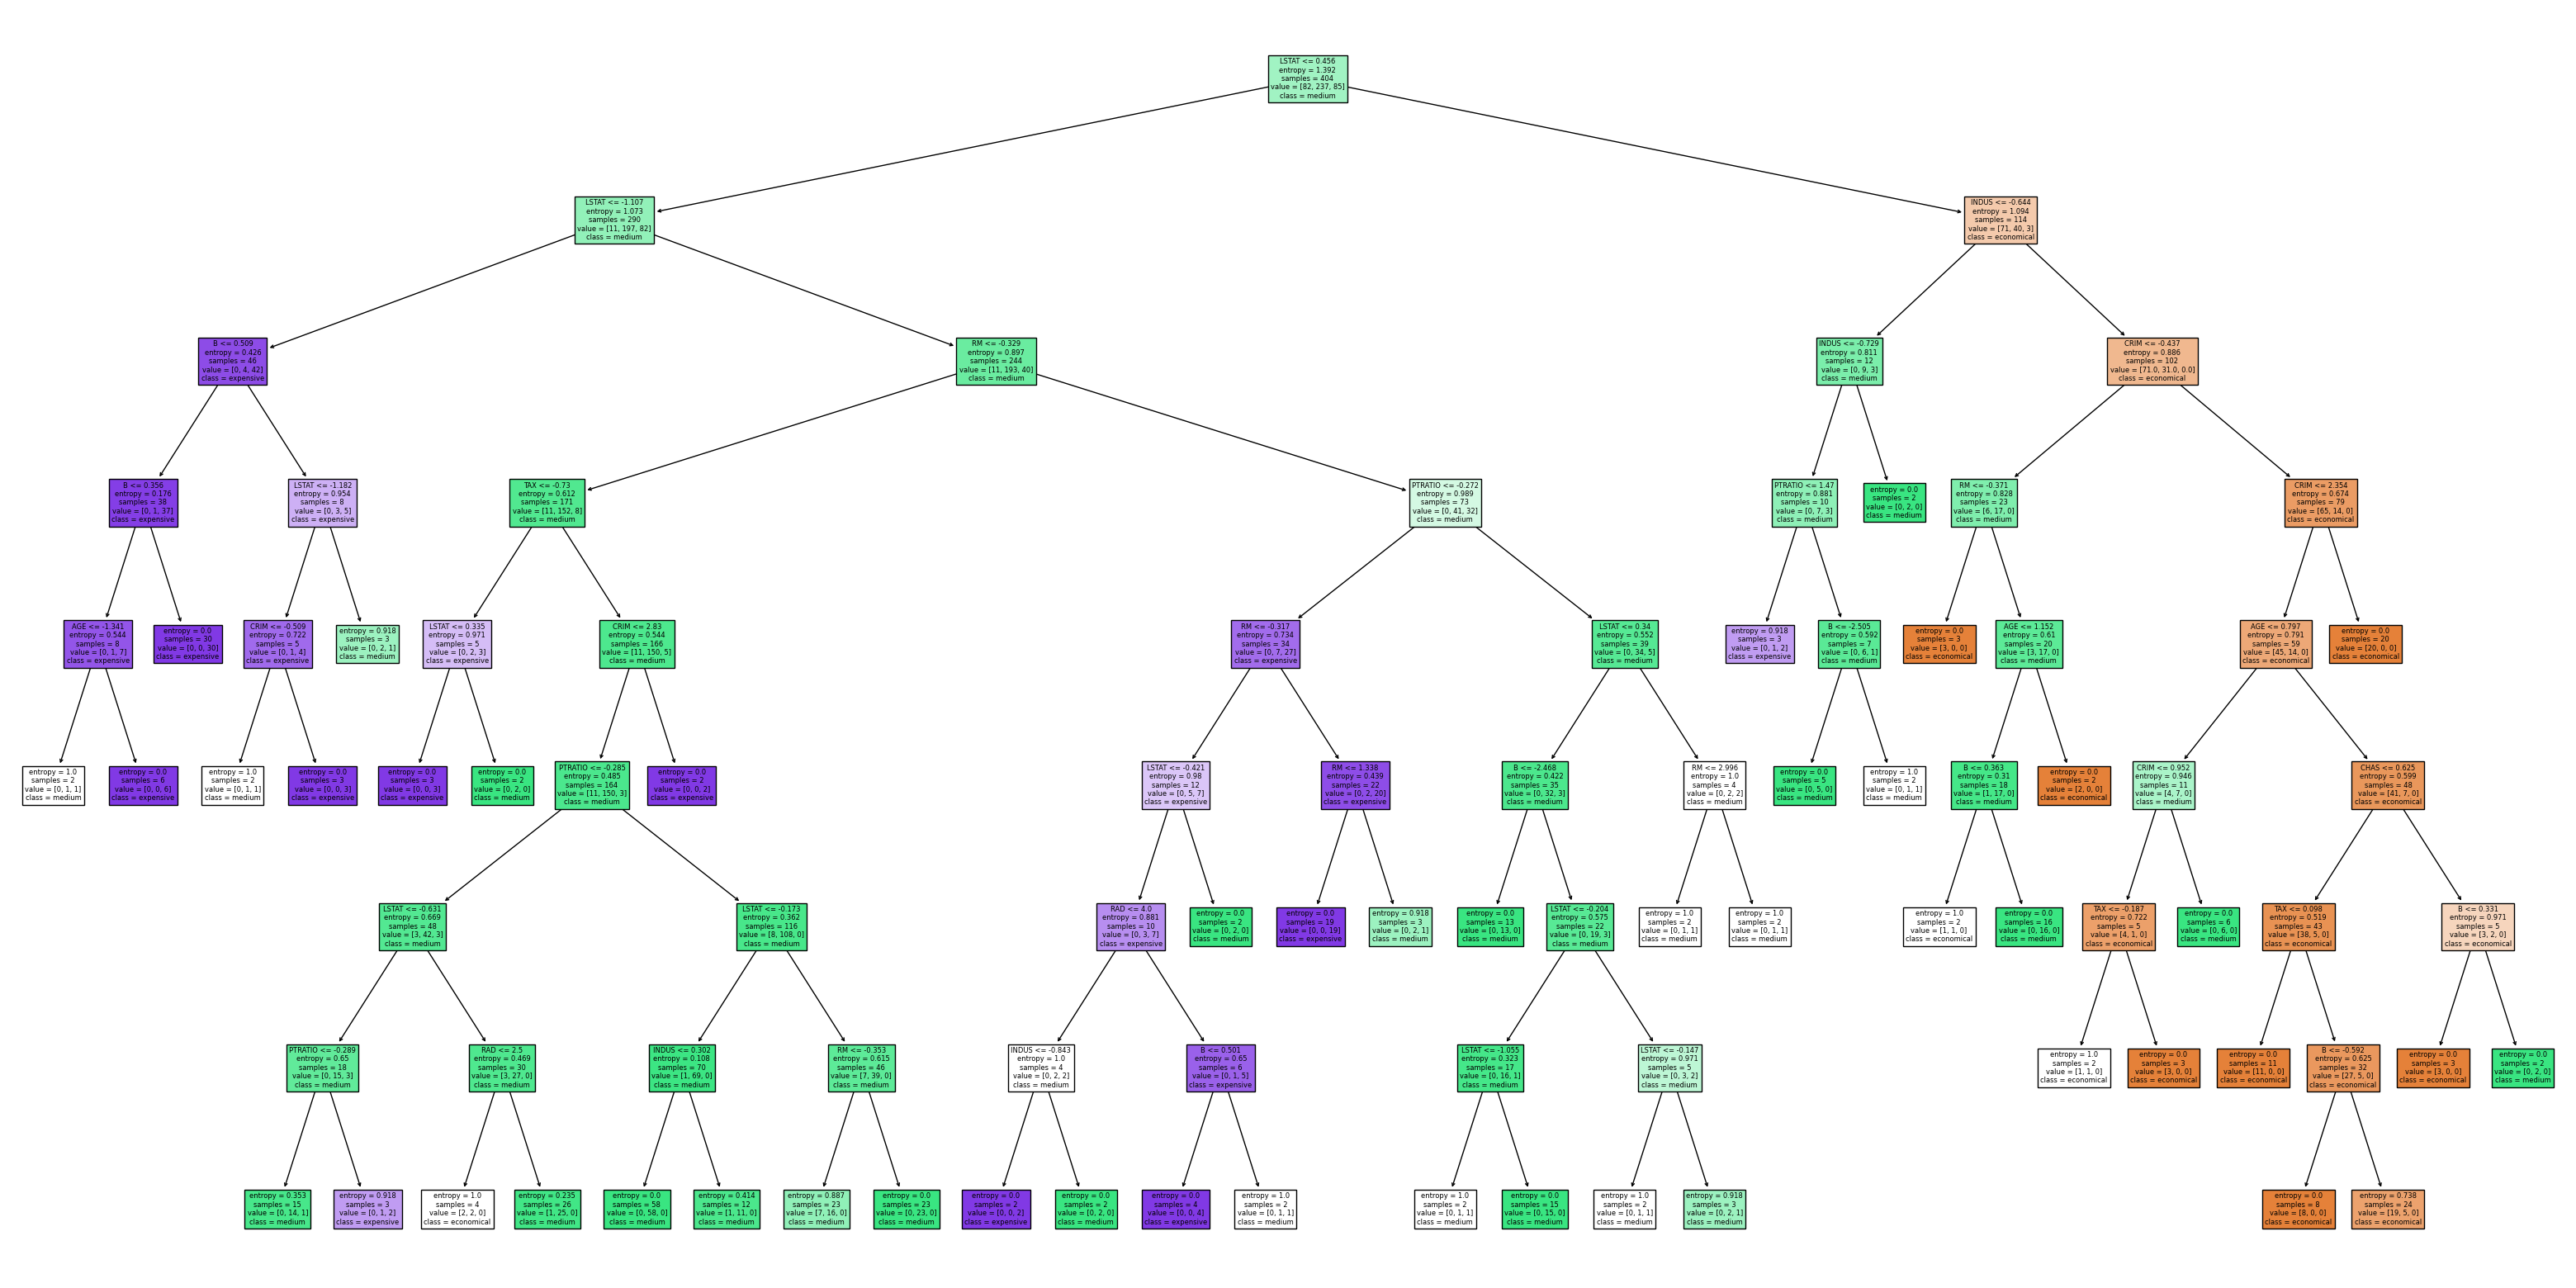

In [77]:
plt.figure(figsize=(40, 20))
tree.plot_tree(dec_tree, filled=True, feature_names=train_feature_clf.columns, class_names=["economical", "medium", "expensive"])
plt.show()

In [124]:
# Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 4, 'min_samples_split': 2}
dec_tree = DecisionTreeClassifier(criterion='gini',  # Criterion for the split, 'gini' or 'entropy'
                             max_depth=8,    # Maximum depth of the tree
                             min_samples_split=2,  # Minimum number of samples required to split an internal node
                             min_samples_leaf=3,   # Minimum number of samples required to be at a leaf node
                             max_features=4,    # Number of features to consider when looking for the best split
                             random_state=10)

new_df = df.drop(columns=["MEDV"])
train_feature_clf, test_feature_clf, train_target_clf, test_target_clf = data_splitter(new_df, 0.8, "EXP")

dec_tree.fit(train_feature_clf, train_target_clf)
y_pred = dec_tree.predict(test_feature_clf)

# Confusion matrix
conf_matrix = confusion_matrix(list(test_target_clf.values), list(y_pred))
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
class_report = classification_report(list(test_target_clf.values), list(y_pred))
print(f'\nClassification Report:\n{class_report}')

Confusion Matrix:
[[16  3  0]
 [ 5 55  7]
 [ 0  2 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.92      0.82      0.87        67
           2       0.67      0.88      0.76        16

    accuracy                           0.83       102
   macro avg       0.78      0.85      0.81       102
weighted avg       0.85      0.83      0.84       102



In [ ]:
plt.figure(figsize=(40, 20))
tree.plot_tree(dec_tree, filled=True, feature_names=train_feature_clf.columns, class_names=["economical", "medium", "expensive"])
plt.show()

In [109]:
# << Grid Search for Decision Tree >>

param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5],
    'max_features': [4, 6, 8, 10]
}

grid_search = GridSearchCV(dec_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_feature_clf, train_target_clf)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 4, 'min_samples_split': 2}
Best Score: 0.826604938271605


<h3 style="color:#41ff00">K-Nearest Neighbors</h3>
<p>


<strong>Advantages and Disadvantages of 1-nearest Neighbor Algorithm</strong>
<hr>
<strong>+ Simplicity:</strong>
The 1-NN algorithm is straightforward to implement and understand. It doesn't require any complex training phase; just storing the training data is enough. The concept of "closeness" or "similarity" is easy to grasp, making the algorithm highly intuitive.

<strong>+ No Training Phase:</strong>
Since 1-NN doesn't involve an explicit training phase (other than storing the data), it is very fast to set up.

<strong>+ Adaptability:</strong>
The model can easily adapt to new data points without the need for retraining. Adding new data points simply involves adding them to the dataset

<strong>- Sensitivity to Noise:</strong>
1-NN is highly sensitive to noisy data and outliers, as the prediction is based entirely on the nearest single data point, which could be an anomaly.

<strong>- No Generalization:</strong>
Unlike other algorithms that build a generalized model from the training data, 1-NN simply memorizes the data. This lack of abstraction can lead to poor generalization on unseen data if the training set is not representative.



</p>

In [142]:
# << KNN >>

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_feature_clf, train_target_clf)
knn_y_pred = knn.predict(test_feature_clf)

knn_conf_mat = confusion_matrix(test_target_clf, knn_y_pred)
print('Confusion Matrix For Validation Set:')
print(knn_conf_mat)

knn_class_repo = classification_report(test_target_clf, knn_y_pred)
print('\nClassification Report For Validation Set:')
print(knn_class_repo)

Confusion Matrix For Validation Set:
[[19  0  0]
 [ 6 58  3]
 [ 0  8  8]]

Classification Report For Validation Set:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       0.88      0.87      0.87        67
           2       0.73      0.50      0.59        16

    accuracy                           0.83       102
   macro avg       0.79      0.79      0.78       102
weighted avg       0.83      0.83      0.83       102



In [179]:
# << Grid Search for KNN >>

param_grid = {
    'n_neighbors': [2, 3, 4, 6, 7, 8, 9, 10], 
}

grid_search = GridSearchCV(knn, param_grid, cv=6, scoring='accuracy')
grid_search.fit(train_feature_clf, train_target_clf)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'n_neighbors': 10}
Best Score: 0.7498902546093064


<h3 style="color:#41ff00">Random Forest</h3>

<p>
<hr>
<strong>When bad to use RF?</strong><br><br>
<strong>Imbalanced Data:</strong>
Random forests may not perform well on highly imbalanced datasets, where one class significantly outnumbers the others. While random forests inherently handle class imbalances to some extent, they may still favor the majority class in predictions. Specialized techniques or algorithms designed for imbalanced data, such as SMOTE or cost-sensitive learning, might be more effective.

<strong>Small Datasets:</strong>
Random forests may not perform well on small datasets, as they require a sufficient amount of data to learn meaningful patterns and reduce variance. In such cases, simpler models with fewer parameters might generalize better and provide more reliable predictions.

<hr>
<strong>Number of trees?</strong><br><br>
<strong>Too Few Trees:</strong>
If the number of trees is too low, the random forest may suffer from high bias and underfit the data. Increasing the number of trees can help reduce bias and improve predictive performance.

<strong>Too Many Trees:</strong>
Adding more trees beyond a certain point may not lead to significant improvements in performance and can increase computational cost. There's typically a point of diminishing returns where adding more trees provides marginal benefits.

<strong>Effective Number of Trees:</strong>
The effective number of trees depends on the complexity of the dataset and the desired balance between bias and variance. It's often determined through cross-validation or by monitoring performance metrics on a validation set.

</p>

In [162]:
# << Random Forest >>

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=14, max_depth=None, min_samples_split=2)
rf_classifier.fit(train_feature_clf, train_target_clf)
y_pred = rf_classifier.predict(test_feature_clf)

# Confusion Matrix
conf_matrix = confusion_matrix(list(test_target_clf.values), list(y_pred))
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(list(test_target_clf.values), list(y_pred))
print(f'\nClassification Report:\n{class_report}')

Confusion Matrix:
[[17  2  0]
 [ 2 58  7]
 [ 0  2 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.94      0.87      0.90        67
           2       0.67      0.88      0.76        16

    accuracy                           0.87       102
   macro avg       0.83      0.88      0.85       102
weighted avg       0.89      0.87      0.88       102



In [149]:
# << Grid Search for RF >>

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_feature_clf, train_target_clf)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8515432098765432


<h3 style="color:#41ff00">Support Vector Machine</h3>

Grid search and random search are two popular hyperparameter tuning techniques used to find the optimal hyperparameters for machine learning models. Each has its own advantages and best-use conditions:

### Grid Search
**Description**: Grid search exhaustively searches through a specified subset of hyperparameters. It evaluates all possible combinations of a given set of hyperparameters.

### Random Search
**Description**: Random search samples hyperparameter combinations randomly from a specified distribution over the hyperparameter space.


- **Use Grid Search**:
  - When the hyperparameter space is small and you can afford the computational cost.
  - When you need to ensure the best possible hyperparameters are found within a defined grid.

- **Use Random Search**:
  - When the hyperparameter space is large, and exhaustive search is infeasible.
  - When computational resources are limited and you need to balance between thoroughness and efficiency.
  - When quick prototyping is required to get a good set of hyperparameters without exhaustive search.

Both techniques can also be used in conjunction with other methods, such as cross-validation, to ensure robust evaluation of hyperparameters. For more advanced needs, Bayesian optimization can be considered as it builds a probabilistic model of the objective function and uses it to select the most promising hyperparameters to evaluate next.

In [143]:
# << RBF Kernel >>

rbf_kernel = SVC(kernel='rbf', gamma=0.1, C=1.0)
rbf_kernel.fit(train_feature_clf, train_target_clf)
y_pred_rbf = rbf_kernel.predict(test_feature_clf)

# Confusion Matrix
conf_matrix = confusion_matrix(list(test_target_clf.values), list(y_pred))
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(list(test_target_clf.values), list(y_pred))
print(f'\nClassification Report:\n{class_report}')



Confusion Matrix:
[[16  3  0]
 [ 5 55  7]
 [ 0  2 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.92      0.82      0.87        67
           2       0.67      0.88      0.76        16

    accuracy                           0.83       102
   macro avg       0.78      0.85      0.81       102
weighted avg       0.85      0.83      0.84       102



In [144]:
# << Linear Kernel >>

linear_kernel = SVC(kernel='linear', C=1.0)
linear_kernel.fit(train_feature_clf, train_target_clf)
y_pred_linear = linear_kernel.predict(test_feature_clf)

# Confusion Matrix
conf_matrix = confusion_matrix(test_target_clf, y_pred_linear)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(test_target_clf, y_pred_linear)
print(f'\nClassification Report:\n{class_report}')

Confusion Matrix:
[[17  2  0]
 [ 4 56  7]
 [ 0  3 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.92      0.84      0.88        67
           2       0.65      0.81      0.72        16

    accuracy                           0.84       102
   macro avg       0.79      0.85      0.82       102
weighted avg       0.86      0.84      0.85       102



<h3 style="color:#41ff00">XGBOOST</h3>
XGBoost (Extreme Gradient Boosting) is a powerful and widely used machine learning algorithm for classification and regression tasks. It belongs to the ensemble learning family, specifically boosting algorithms, which combine the predictions of multiple weak learners (typically decision trees) to produce a strong learner. Here's how XGBoost operates:

1. **Gradient Boosting Framework**:
   - XGBoost is based on the gradient boosting framework, where models are trained sequentially, and each new model (or weak learner) is designed to correct the errors made by the previous models.
   
2. **Objective Function**:
   - XGBoost uses a differentiable loss function (objective function) to quantify the difference between the actual and predicted values. The objective function consists of two parts: a loss term, which measures the difference between the predicted and actual values, and a regularization term, which penalizes complex models to prevent overfitting.

3. **Boosting Iterations**:
   - XGBoost builds an ensemble of decision trees in a sequential manner. At each iteration, it adds a new decision tree to the ensemble to correct the errors made by the existing ensemble.
   
4. **Gradient Boosting**:
   - During each iteration, XGBoost fits a new decision tree to the negative gradient of the loss function with respect to the predictions of the current ensemble. This means that the new tree is trained to predict the residuals (the differences between the actual and predicted values) of the current ensemble.
   
5. **Tree Construction**:
   - XGBoost constructs decision trees using a greedy algorithm that recursively splits the data based on the feature that provides the best reduction in the loss function. It employs techniques like maximum depth constraints, minimum child weight, and minimum loss reduction to control the tree's complexity and prevent overfitting.
   
6. **Regularization**:
   - XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in its objective function to penalize complex models and encourage sparsity in feature selection. This helps prevent overfitting and improves the model's generalization performance.
   
7. **Tree Pruning**:
   - XGBoost applies post-pruning techniques to prune the trees in the ensemble. It removes splits that do not lead to a significant reduction in the loss function, thus simplifying the trees and reducing overfitting.
   
8. **Learning Rate (Shrinkage)**:
   - XGBoost introduces a learning rate parameter (also known as shrinkage) to control the contribution of each new tree to the ensemble. A smaller learning rate makes the algorithm more conservative and helps prevent overfitting.

9. **Parallelization**:
   - XGBoost is highly scalable and supports parallel and distributed computing. It efficiently utilizes multicore CPUs during training and can leverage distributed computing frameworks like Apache Spark for large-scale data processing.

In [ ]:
dtrain = xgb.DMatrix(train_feature_clf, label=train_target_clf)
dtest = xgb.DMatrix(test_feature_clf, label=test_target_clf)

params = {
    'objective': 'binary:logistic', # for binary classification
    'max_depth': 3,
    'eta': 0.1, # learning rate
    'eval_metric': 'logloss' # evaluation metric
}

num_rounds = 100
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(params, dtrain, num_rounds, watchlist, early_stopping_rounds=10)
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob] # for binary classification

# Classification Report
class_report = classification_report(test_target_clf, y_pred)
print(f'\nClassification Report:\n{class_report}')

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [ ]:
def polynomial_regression(x, y, degree):
  pass
  #TO DO

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [ ]:
def feature_derivative(errors, feature):
    return 2 * np.dot(errors, feature)

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [ ]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [ ]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

    return weights, bias

In [ ]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias